## 기초 통계

$\alpha = \beta$

## 공통 코드

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy as sp

import scipy.stats

#시각화 패키지
import matplotlib.pyplot as plt

#시각화에서 한글을 사용하기 위한 설정
import platform
from matplotlib import font_manager, rc

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
    
#윈도우의 경우
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)

#시각화에서 음수를 표현하기 위한 설정
import matplotlib

matplotlib.rcParams['axes.unicode_minus'] = False 

# Jupyter Notebook의 출력을 소수점 이하 3자리로 제한 
%precision 3

# precision은 소수점은 과학적 표기법으로 변환할 자릿수를 설정
# 아래와 같이 하면 소수점 셋째 자리 밑으로는 과학적 표기법으로 표시
pd.options.display.precision = 3


## 집합

In [11]:
# dir(set)
# dir(frozenset)

# set 생성 - 원소를 가지고 생성
a = {1, 2, 3, 1, 2}
print(a) # 중복 제거

# 비어있는 set생성
b = set()
c = {}

print(b) 
print(type(b)) 

print(c)
print(type(c))

# frozenset 생성 -  immutable 이므로 데이터 수정이 안된다
# d = frozenset() # 이걸로 끝!
d = frozenset([1, 3, 5])
print(d)
print(type(d))

{1, 2, 3}
set()
<class 'set'>
{}
<class 'dict'>
frozenset({1, 3, 5})
<class 'frozenset'>


In [15]:
# set은 & 연산자 가능 (__and__) 가 존재
# 원래는 함수이지만 연산자를 이용해서 호출할 수 있도록 작성 - 연산자 오버로딩
# Overloading : 동일한 이름의 메서드가 2개 이상 존재하는 경우로 이 메서드는 
#               매개 변수의 개수나 자료형이 달라야합니다.
print( {1, 2, 3} & {2, 3, 4}) # 교집합
print( {1, 2, 3} | {2, 3, 4}) # 합집합
print( {1, 2, 3} - {2, 3, 4}) # 차집합

print( {1, 2, 3} > { 2, 3}) # 부분 집합 여부
print( {1, 2, 3} < { 2, 3}) # 부분 집합 여부

{2, 3}
{1, 2, 3, 4}
{1}
True
False


## 확률을 위한 패키지

In [17]:
# 앞에 ! 의미는 이 명령은 python 코드가 아니라, 운영체제에서 수행하도록하는
#명령이라는 것을 명시적으로 표현하기 위해
!pip install pgmpy

  Obtaining dependency information for pgmpy from https://files.pythonhosted.org/packages/eb/9a/2fcb6fdfd998a016cef29ca3eab30b98b6c232b6e9a0444df07f0ad47f8d/pgmpy-0.1.24-py3-none-any.whl.metadata
  Obtaining dependency information for torch from https://files.pythonhosted.org/packages/58/b8/51b956c2da9729390a3080397cd2f31171394543af7746681466e372f69a/torch-2.2.0-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/65.5 kB ? eta -:--:--
     ---------------------------------------- 65.5/65.5 kB 3.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
   -------- ------------------------------- 0.4/2.0 MB 8.5 MB/s eta 0:00:01
   ---------------------- ----------------- 1.1/2.0 MB 11.8 MB/s eta 0:00:01
   ---------------------------------------- 2.0/2.0 MB 13.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/198.6 MB ? eta -:--:--
   ---------------------------------------- 1.4/198.6 MB 29.4 MB/s eta 0:00:07

  Obtaining dependency information for pgmpy from https://files.pythonhosted.org/packages/eb/9a/2fcb6fdfd998a016cef29ca3eab30b98b6c232b6e9a0444df07f0ad47f8d/pgmpy-0.1.24-py3-none-any.whl.metadata
  Using cached pgmpy-0.1.24-py3-none-any.whl.metadata (6.3 kB)
Using cached pgmpy-0.1.24-py3-none-any.whl (2.0 MB)


In [22]:
# 남자가 12, 여자 8 경우 독립 확률
from pgmpy.factors.discrete import JointProbabilityDistribution as JPD

# help(JPD)
# 남자와 여자는 상호 배타적인 사건이라서 하나의 확률 변수로 표현
# 두 번째 2는 확률 변수에 대한 사건의 개수
# 세 번째는 각 사건의 확률
px = JPD(['X'], [2], [12/20, 8/20])
print(px)

px = JPD(['X'], [2], np.array([12,8]) / 20 )
print(px)


+------+--------+
| X    |   P(X) |
+======+========+
| X(0) | 0.6000 |
+------+--------+
| X(1) | 0.4000 |
+------+--------+
+------+--------+
| X    |   P(X) |
+======+========+
| X(0) | 0.6000 |
+------+--------+
| X(1) | 0.4000 |
+------+--------+


In [25]:
# 결합 확률
# X : 남자. 여자
# Y : 머리가 짧음, 김
px = JPD(['X', 'Y'], [2, 2], np.array([3, 9, 1, 7 ]) / 20 )
print(px)

+------+------+----------+
| X    | Y    |   P(X,Y) |
+======+======+==========+
| X(0) | Y(0) |   0.1500 |
+------+------+----------+
| X(0) | Y(1) |   0.4500 |
+------+------+----------+
| X(1) | Y(0) |   0.0500 |
+------+------+----------+
| X(1) | Y(1) |   0.3500 |
+------+------+----------+


In [27]:
# 주변 확률
pxy = JPD(['X', 'Y'], [2,2], np.array([3, 9 ,1, 7]) / 20)

# X 주변 확률
pmx = pxy.marginal_distribution(['X'], inplace = False)
print(pmx)

pmx = pxy.marginalize(['Y'], inplace = False)
print(pmx)

+------+--------+
| X    |   P(X) |
+======+========+
| X(0) | 0.6000 |
+------+--------+
| X(1) | 0.4000 |
+------+--------+
+------+--------+
| X    |   P(X) |
+======+========+
| X(0) | 0.6000 |
+------+--------+
| X(1) | 0.4000 |
+------+--------+


In [28]:
result = (0.99 * 0.002) / ((0.99 * 0.002) + 0.05*(1-0.002))
print(result)

0.038164996144949885


## 데이터 가져오기 - descriptive.csv

In [4]:
# 이 파일은 한글이 없음 - 인코딩 필요 없음
# 구분자가 , -구분자 설정 필요 없음
# 첫 번째 줄이 컬럼명 - header 설정 필요 없음
university = pd.read_csv('python_statistics/data/descriptive.csv')
print(university.head())
university.info()

   resident  gender  age  level  cost  type  survey  pass
0       1.0       1   50    1.0   5.1   1.0     1.0   2.0
1       2.0       1   54    2.0   4.2   1.0     2.0   2.0
2       NaN       1   62    2.0   4.7   1.0     1.0   1.0
3       4.0       2   50    NaN   3.5   1.0     4.0   1.0
4       5.0       1   51    1.0   5.0   1.0     3.0   1.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   resident  279 non-null    float64
 1   gender    300 non-null    int64  
 2   age       300 non-null    int64  
 3   level     287 non-null    float64
 4   cost      271 non-null    float64
 5   type      274 non-null    float64
 6   survey    187 non-null    float64
 7   pass      279 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 18.9 KB


In [5]:
# 성별은 명목 척도
# print(university['gender'].describe()) # 의미가 없음

# 명목 척도는 데이터의 개수정도를 확인 - 이상치도 확인 가능
# print(university['gender'].value_counts())
# 0 과 5번 데이터는 이상한 데이터 -제거(직접 제거해도 되고 올바른 데이터만 필터링)

university_gender = university[(university['gender'] == 1) | (university['gender'] == 2)] 
print(university_gender['gender'].value_counts())


gender
1    173
2    124
Name: count, dtype: int64


TypeError: Axes.bar() missing 1 required positional argument: 'height'

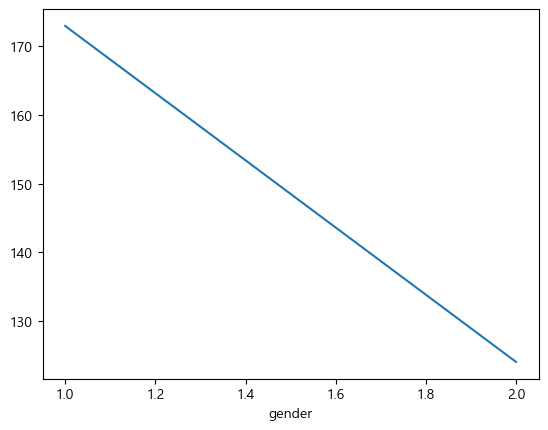

In [6]:
# 막대 그래프 그리기
university_gender['gender'].value_counts().plot().bar('color = k')

In [7]:
# 순서 척도
# level 이 순서 척도
university_gender['level'].value_counts()a

level
1.0    115
2.0     99
3.0     70
Name: count, dtype: int64

In [9]:
# 등간 척도
university_gender['survey'].describe()

count    185.000
mean       2.589
std        0.980
min        1.000
25%        2.000
50%        2.000
75%        3.000
max        5.000
Name: survey, dtype: float64

In [10]:
# 비율 척도
print(university_gender['cost'].describe())

# 일반적으로 빈도를 직접 구하지는 않는 경우가 많음
# 대부분의 경우 일정한 범위로 편집을 해서 빈도를 구합니다.

# 직접 입력 받는 경우가 많아서, 항상 이상치 탐지를 수행해야합니다.
# print(university_gender['cost'].value_counts())


count    268.000
mean       8.754
std       69.356
min     -457.200
25%        4.400
50%        5.400
75%        6.300
max      675.000
Name: cost, dtype: float64
cost
 5.0      18
 6.3      16
 4.0      15
 6.0      14
 6.2      13
 6.4      11
 5.1      10
 5.2       9
 4.1       9
 6.1       8
 6.7       8
 5.5       8
 5.3       7
 5.7       6
 4.7       6
 3.0       6
 5.8       5
 4.3       5
 5.4       5
 3.5       5
 4.6       5
 6.8       4
 5.6       4
 4.4       4
 6.9       4
 6.5       4
 7.7       4
 4.9       4
 3.9       3
 7.0       3
 4.2       3
 3.8       3
 7.1       3
-235.8     2
 336.5     2
 2.3       2
 7.2       2
 7.9       2
 75.1      2
 115.7     2
 5.9       2
 85.1      2
 3.4       2
-5.9       2
 4.8       2
 3.3       2
-4.8       1
-345.6     1
 675.0     1
 225.8     1
-457.2     1
 1.0       1
-75.0      1
 2.1       1
 257.8     1
 4.5       1
Name: count, dtype: int64


In [35]:
# cost 값이 2 ~ 10 인 데이터만 추출
cost = university_gender['cost']
cost = cost[(cost >= 2) & (cost <= 10)]
print(cost.value_counts())

cost
5.0    18
6.3    16
4.0    15
6.0    14
6.2    13
6.4    11
5.1    10
4.1     9
5.2     9
5.5     8
6.1     8
6.7     8
5.3     7
3.0     6
5.7     6
4.7     6
4.6     5
4.3     5
5.8     5
5.4     5
3.5     5
5.6     4
6.9     4
4.9     4
6.5     4
4.4     4
6.8     4
7.7     4
3.8     3
3.9     3
7.0     3
4.2     3
7.1     3
3.4     2
3.3     2
7.2     2
5.9     2
4.8     2
2.3     2
7.9     2
2.1     1
4.5     1
Name: count, dtype: int64


In [36]:
# 범주화 : 2~3 - 1 // 3~6 - 2 // 6~ - 3 
cost[(cost >= 2 ) & (cost <= 3)] = 1
cost[(cost > 3 ) & (cost <= 6)] = 2
cost[(cost > 6 )] = 3

print(cost.value_counts())



cost
2.0    157
3.0     82
1.0      9
Name: count, dtype: int64


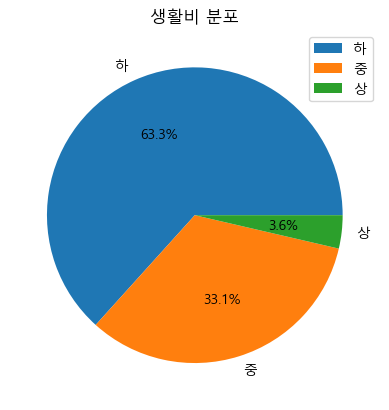

In [40]:
# # 실수를 정수로 변환
cost = cost.astype(int)
# print(cost.value_counts())

plt.pie(cost.value_counts(), labels = ['하', '중', '상'], autopct= '%1.1f%%')
plt.title('생활비 분포')
plt.legend()
plt.show()


In [41]:
# 기하 평균

import math
# 데이터 생성
s = pd.Series([100, 110, 107.8])
print("산술 평균을 이용한 평균 성장률: ", s.pct_change().mean())
print(100 * 1.040000000000000036 * 1.040000000000000036)
# 비율의 평균을 구할 때는 산술 평균을 사용하지 않고 기하 평균을 사용해야 함
print("기하평균을 이용한 평균 성장률: ", math.sqrt((110/100) * (107.8/110)))
print(100 * 1.0382677881933928 * 1.0382677881933928)

산술 평균을 이용한 평균 성장률:  0.040000000000000036
108.16
기하평균을 이용한 평균 성장률:  1.0382677881933928
107.8


In [42]:
# 조화 평균 - 속도의 평균
print(600 / 80) # 산술 평균 - 7.5
print(600 / ((2 * 100 * 60) / (100 + 60))) # 조화 평균 - 8

7.5
8.0


## 중앙값

In [44]:
# Windows에서 만든 파일인데 한글이 포함되어 있음
# 이 경우 유니코드 에러가 발생하면 encoding을 설정해주면 됨
tdata = pd.read_csv("python_statistics/data/tdata.csv", encoding = "cp949")
# tdata.info()

# 일반적인 산술평균
print(tdata['성적'].mean())
# 중앙값
print(tdata['성적'].median())
# 절사 평균 - scipy.stats.trim_mean으로 구하는데 매개변수로 잘라낼 비율을 설정
# 10% 제거하고 평균 구하기
from scipy import stats # 통계쪽 할 때 임포트해두는 것이 좋음
print(stats.trim_mean(tdata['성적'], 0.1))
# 3개의 값이 별 차이가 없음
# 크게 이상한 데이터가 없음
print(tdata)

77.1
77.5
77.0
   번호  성적
0   1  77
1   2  85
2   3  63
3   4  69
4   5  82
5   6  78
6   7  73
7   8  87
8   9  65
9  10  92


In [48]:
state = pd.read_csv('python_statistics/data/state.csv')
# print(state['Population'])
print("단순 평균:", state['Population'].mean())
print("중앙값:", state['Population'].median())
print("절사 평균:", stats.trim_mean(state['Population'], 0.1))

단순 평균: 6162876.3
중앙값: 4436369.5
절사 평균: 4783697.125


In [49]:
# 가중 평균과 가중 중앙값
!pip install wquantiles

import wquantiles

# 살인율의 평균
# 단순 평균
print("단순 살인율의 평균:", state['Murder.Rate'].mean())
# 가중 평균
print("가중치를 적용한 살인율의 평균:", 
      np.average(state['Murder.Rate'], weights = state['Population']))
# 가중 중앙값
print("가중치를 적용한 살인율의 중앙값:", 
      wquantiles.median(state['Murder.Rate'], weights = state['Population']))


단순 살인율의 평균: 4.066
가중치를 적용한 살인율의 평균: 4.445833981123393
가중치를 적용한 살인율의 중앙값: 4.4


In [50]:
university['cost'].value_counts()

cost
 5.0      18
 6.3      16
 4.0      15
 6.0      14
 6.2      13
 5.1      11
 6.4      11
 5.5       9
 4.1       9
 5.2       9
 6.1       8
 6.7       8
 5.3       7
 3.0       6
 4.7       6
 5.7       6
 4.6       5
 5.8       5
 5.4       5
 3.5       5
 4.3       5
 6.5       4
 7.7       4
 7.1       4
 6.8       4
 4.9       4
 5.6       4
 4.4       4
 6.9       4
 3.9       3
 7.0       3
 4.2       3
 3.8       3
-235.8     2
 336.5     2
 2.3       2
 7.2       2
 7.9       2
 75.1      2
 115.7     2
 5.9       2
 3.3       2
 85.1      2
 3.4       2
-5.9       2
 4.8       2
-4.8       1
-345.6     1
 675.0     1
 225.8     1
-457.2     1
 1.0       1
-75.0      1
 2.1       1
 257.8     1
 4.5       1
Name: count, dtype: int64

## 최빈값

In [51]:
print(state['Murder.Rate'].mode())
print(university['age'].mode())

0    1.6
1    2.0
2    5.7
Name: Murder.Rate, dtype: float64
0    48
Name: age, dtype: int64


## 변이 추정

### 편차

In [53]:
state = pd.read_csv('python_statistics/data/state.csv')

# 표준 편차
print(state['Population'].std())

# IQR: 75% - 25%
# 변이 추정에 사용하고 이상치를 검출할 때도 이용
# IQR * 1.5를 한 값을 구한 후 25% 숫자에서 뺀 값보다 작은 값이나
# 75% 숫자에 더한 값보다 큰 값을 이상한 데이터로 간주하기도 함
# 이 방식은 데이터의 개수가 12개보다 적으면 검출을 못 함
# 이런 경우에는 중위값을 가지고 보정해서 구하기도 함
print(state['Population'].quantile(0.75) - state['Population'].quantile(0.25))

# 중위 절대 편차 - MAD
print(abs(state['Population'] - state['Population'].median() / 0.6744897501960817))

from statsmodels import robust
print(robust.scale.mad(state['Population']))

6848235.347401142
4847308.0
0     1.798e+06
1     5.867e+06
2     1.854e+05
3     3.661e+06
4     3.068e+07
5     1.548e+06
6     3.003e+06
7     5.679e+06
8     1.222e+07
9     3.110e+06
10    5.217e+06
11    5.010e+06
12    6.253e+06
13    9.357e+04
14    3.531e+06
15    3.724e+06
16    2.238e+06
17    2.044e+06
18    5.249e+06
19    8.038e+05
20    2.974e+04
21    3.306e+06
22    1.273e+06
23    3.610e+06
24    5.884e+05
25    5.588e+06
26    4.751e+06
27    3.877e+06
28    5.261e+06
29    2.215e+06
30    4.518e+06
31    1.280e+07
32    2.958e+06
33    5.905e+06
34    4.959e+06
35    2.826e+06
36    2.746e+06
37    6.125e+06
38    5.525e+06
39    1.952e+06
40    5.763e+06
41    2.313e+05
42    1.857e+07
43    3.813e+06
44    5.952e+06
45    1.424e+06
46    1.472e+05
47    4.724e+06
48    8.904e+05
49    6.014e+06
Name: Population, dtype: float64
3849876.1459979336


## 데이터 분포를 확인하기 위한 시각화

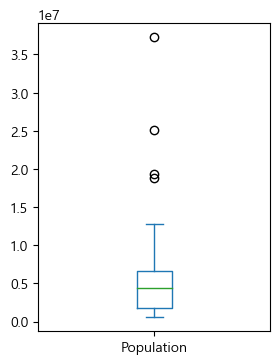

In [54]:
# 상자 그림
ax = (state['Population']).plot.box(figsize=(3,4))
plt.show()

In [61]:
# 도수 분포표
# help(pd.cut)
# 인구수를 10개의 구간으로 분할해서 도수 분표포(value_counts())출력
binnedPopulation = pd.cut(state['Population'], bins = 10)
binnedPopulation.value_counts()

Population
(526935.67, 4232659.0]      24
(4232659.0, 7901692.0]      14
(7901692.0, 11570725.0]      6
(11570725.0, 15239758.0]     2
(15239758.0, 18908791.0]     1
(18908791.0, 22577824.0]     1
(22577824.0, 26246857.0]     1
(33584923.0, 37253956.0]     1
(26246857.0, 29915890.0]     0
(29915890.0, 33584923.0]     0
Name: count, dtype: int64

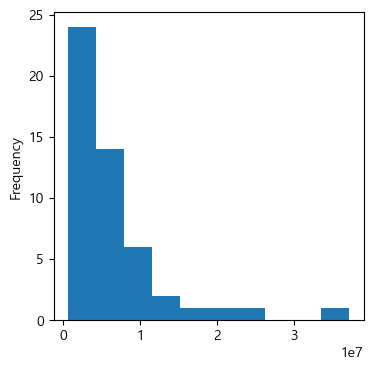

In [63]:
# 히스토그램
ax = (state['Population']).plot.hist(figsize=(4,4))
plt.show()

C:\Users\USER\anaconda3\Lib\site-packages\numpy\lib\histograms.py:883: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


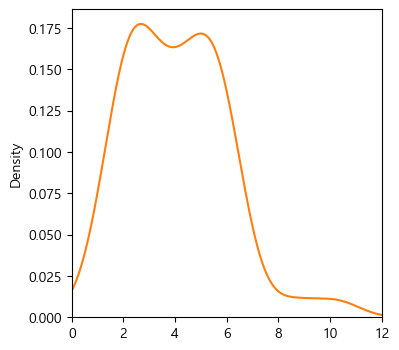

In [67]:
# 밀도 추정
ax = (state['Population']).plot.hist(density = True, xlim = [0, 12],
                                     bins = range(1, 12), figsize=(4,4))

#밀도 추정
state['Murder.Rate'].plot.density(ax = ax)
plt.show()

## 다변량 탐색

In [71]:
#descriptive.csv 파일의 데이터를 이용한 교차 분할표 만들기
print(university.head())

#gender 1 남자, 2 여자
# 성별 필드를 추가해 '남자', '여자'로 기록

university['성별'] = '남자'
idx = 0

for i in university['gender'] :
    if i == 2 :
        university['성별'][idx] = '여자'
    idx = idx + 1
    
# print(university['성별'].value_counts())

university.info()

   resident  gender  age  level  cost  type  survey  pass  성별
0       1.0       1   50    1.0   5.1   1.0     1.0   2.0  남자
1       2.0       1   54    2.0   4.2   1.0     2.0   2.0  남자
2       NaN       1   62    2.0   4.7   1.0     1.0   1.0  남자
3       4.0       2   50    NaN   3.5   1.0     4.0   1.0  여자
4       5.0       1   51    1.0   5.0   1.0     3.0   1.0  남자
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   resident  279 non-null    float64
 1   gender    300 non-null    int64  
 2   age       300 non-null    int64  
 3   level     287 non-null    float64
 4   cost      271 non-null    float64
 5   type      274 non-null    float64
 6   survey    187 non-null    float64
 7   pass      279 non-null    float64
 8   성별        300 non-null    object 
dtypes: float64(6), int64(2), object(1)
memory usage: 21.2+ KB


C:\Users\USER\AppData\Local\Temp\ipykernel_16212\2611597971.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  university['성별'][idx] = '여자'
C:\Users\USER\AppData\Local\Temp\ipykernel_16212\2611597971.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  university['성별'][idx] = '여자'
C:\Users\USER\AppData\Local\Temp\ipykernel_16212\2611597971.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  university['성별'][idx] = '여자'
C:\Users\USER

In [76]:
# level : 1.0 > 고졸 , 2.0 > 대졸, 3.0 > 대학원졸 이상, 나머지는 응답 없음
university['학력'] = '응답 없음'
idx = 0

for i in university['level'] :
    if i == 1.0 :
        university['학력'][idx] = '고졸'
    elif i == 2.0 :
        university['학력'][idx] = '대졸'
    elif i == 3.0 :
        university['학력'][idx] = '대학원졸 이상'
    idx = idx + 1
    
print(university['학력'].value_counts())

학력
고졸         117
대졸         100
대학원졸 이상     70
응답 없음       13
Name: count, dtype: int64


C:\Users\USER\AppData\Local\Temp\ipykernel_16212\2113349449.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  university['학력'][idx] = '고졸'
C:\Users\USER\AppData\Local\Temp\ipykernel_16212\2113349449.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  university['학력'][idx] = '대졸'
C:\Users\USER\AppData\Local\Temp\ipykernel_16212\2113349449.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  university['학력'][idx] = '대졸'
C:\Users\USER\Ap

In [82]:
# 교차 분할표 생성은 pandas의 crosstab함수를 활용

# help(pd.crosstab)
print(pd.crosstab(university['학력'], university['성별']))


<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, 고졸 to 응답 없음
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   남자      4 non-null      int64
 1   여자      4 non-null      int64
dtypes: int64(2)
memory usage: 96.0+ bytes
None


## 공분산

In [99]:
# 공분산을 직접 계산
cov_data = pd.read_csv('python_statistics/data/cov.csv')
# print(cov_data.head())

N = len(cov_data)
# print(N)

x = cov_data['x']
y = cov_data['y']

x_mean = np.mean(x)
y_mean = np.mean(y)

# print(x_mean)
# print(y_mean)

# 자유도를 N-1로 공분산 구하기
cov = sum((x - x_mean) * (y - y_mean)) / (N-1)
print("공분산:", cov)

공분산: 7.673333333333336


In [101]:
# numpy의 cov 이용해서 구하기
# cov 함수는 분산, 공분산 행렬을 return
# 0,0 과 1,1은 각각 x와 y의 variance, 0,1 과 1,0 은 x와 y의 covariance
result= np.cov(x, y, ddof = 1) # ddof제약 조건의 수
print(result)

[[ 3.646  7.673]
 [ 7.673 28.011]]
